# Builder

### Problem

A **complex object** requires lstep-by-step initialization of many fields and nested objects. 

Such initialization code is usually buried inside a` monstrous constructor with lots of parameters`. 

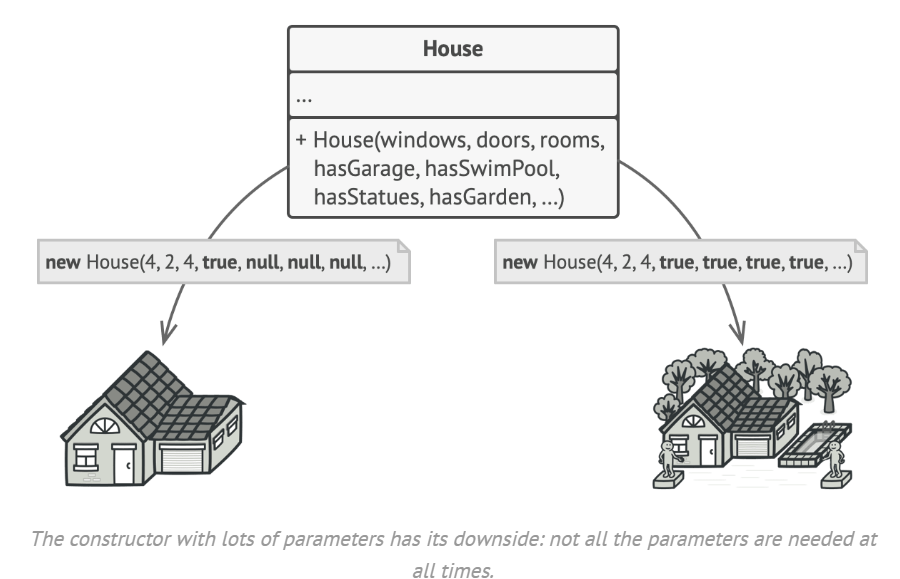

### Solution

**Builder** is a creational design pattern that lets you construct complex objects step by step. 

To create an object, you execute a series of these steps on a builder object. The important part is that you don’t need to call all of the steps. You can call only those steps that are necessary for producing a particular configuration of an object.

**Pattern Structure**

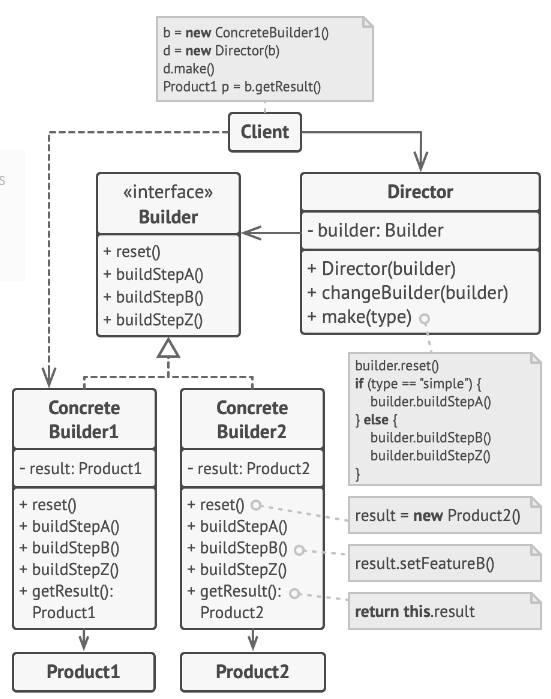

**Terminology**

* `Product`: The Product being built.
* `Builder` Interface: The Interface that the Concrete builder should implement.
* `Concrete Builder`: Provides methods to build and retrieve the concrete product. Implements the Builder Interface.
* `Director`: Has a method (make() on the picture above) that when called creates a customized product using the methods of the Builder.

### Example1

In [5]:
from abc import ABC, abstractmethod

'''The Builder interface specifies methods 
for creating the different parts of the Product objects.'''

class IBuilber(ABC):
    @property
    @abstractmethod
    def product(self) -> None:#getResult method
        pass

    @abstractmethod
    def buildStepA(self) -> None:
        pass

    @abstractmethod
    def buildStepB(self) -> None:
        pass

    @abstractmethod
    def buildStepZ(self) -> None:
        pass

Unlike in other creational patterns, different concrete builders can produce unrelated products. 

In other words, results of various builders may not always follow the same interface

In [21]:
class Product_1:
    def __init__(self) -> None:
        self.__name="Product1"
        self.__components = []
        
    def add(self, component) -> None:
        print(f"The component {component} is being added now...")
        self.__components.append(component)
        print(self.__components)
        
    def showComponents(self) -> None:
        print(f"There is/are {len(self.__components)} component(s) in the {self.__name}")
        print(f"The component of {self.__name} are:")
        for item in self.__components:
            print(item)

Concrete Builders are supposed to provide their own methods for retrieving results. That's because various types of builders may create entirely different products that don't follow the same interface.

Usually, after returning the end result to the client, a builder instance is expected to be ready to start producing another product.

That's why it's a usual practice to call the reset method at the end of the `getProduct` method body.

In [28]:
class ConcreteBuilder1(IBuilber):
    
    '''
    A fresh builder instance should contain a blank product object, which is used in further assembly
    '''
    def __init__(self) -> None:
        self.reset()
        
    def reset(self) -> None:
        print("We have our initial Product")
        self.__product = Product_1()
        
    @property
    def product(self) ->Product_1:
        currentProduct=self.__product
        self.reset()#ready to start producing another product
        return currentProduct
    
    
    def buildStepA(self) -> None:
        self.__product.add("Component A")

    def buildStepB(self) -> None:
        self.__product.add("Component B")

    def buildStepZ(self) -> None:
        self.__product.add("Component Z")
    


The **Director** is only responsible for executing the building steps in a particular sequence. 
It is helpful when producing products according to a specific order or configuration. 

Strictly speaking, the Director class is optional, since the client can control builders directl

In [30]:
from typing import Type
class Director:
    def __init__(self) -> None:
        self.__builder = None

    @property
    def builder(self) -> IBuilber:
        return self.__builder

    @builder.setter
    def builder(self, builder: Type[IBuilber]) -> None:
        self.__builder=builder
        
    def make(self, prodType:str)-> None:
        if prodType=='small':
            self.builder.buildStepA()
        elif prodType=='full':
            self.builder.buildStepA()
            self.builder.buildStepB()
            self.builder.buildStepZ()

The client code creates a builder object, passes it to the director and then initiates the construction process. 

The end result is retrieved from the builder object

In [31]:
hannaDirector=Director()
hannaBuilder = ConcreteBuilder1()
hannaDirector.builder=hannaBuilder

print("Test for Small:")
hannaDirector.make("small")
hannaDirector.builder.product.showComponents()

print("Test for Full:")
hannaDirector.make("full")
hannaBuilder.product.showComponents()




We have our initial Product
Test for Small:
The component Component A is being added now...
['Component A']
We have our initial Product
There is/are 1 component(s) in the Product1
The component of Product1 are:
Component A
Test for Full:
The component Component A is being added now...
['Component A']
The component Component B is being added now...
['Component A', 'Component B']
The component Component Z is being added now...
['Component A', 'Component B', 'Component Z']
We have our initial Product
There is/are 3 component(s) in the Product1
The component of Product1 are:
Component A
Component B
Component Z


### Example2 -  "Punic Wars

Let's give an implementation of the Builder pattern using the example of building armies for the military strategy "Punic Wars“.​

In order not to clutter the code with unnecessary details, we will assume that such types of army as infantry, archers and cavalry are identical for both armies. ​

And in order to demonstrate the capabilities of the Builder pattern, we will introduce new types of combat units:​

* Catapults for the army of Rome.​

* War elephants for the army of Carthage.​